<a href="https://colab.research.google.com/github/PaulinaRuizB/Signal_Theory/blob/main/Task_3_PSD_of_a_WGN_with_cosine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Periodogram Method**

Let $x[n]$ be a discrete-time signal of length $N$, for $n = 0, 1, \dots, N-1$.

The first step involves computing the **Discrete Fourier Transform (DFT)** of the signal $x[n]$. The formula for the DFT $X[k]$ is:
$$
X[k] = \sum_{n=0}^{N-1} x[n] e^{-i 2 \pi \frac{k n}{N}}
$$
for $k = 0, 1, \dots, N-1$. This transforms the signal into the frequency domain, where $k$ corresponds to a specific frequency bin.

The **Periodogram**, as an estimate of the Power Spectral Density (PSD), is then computed by taking the squared magnitude of the DFT coefficients and normalizing by the signal length $N$:
$$
P[k] = \frac{1}{N} \left| X[k] \right|^2
$$
This is calculated for each frequency bin $k$. The resulting values $P[k]$ represent the estimated power density at the frequency $f_k = k \cdot \frac{f_s}{N}$, where $f_s$ is the sampling frequency (if applicable).

In these formulas:
- $x[n]$ is the input discrete-time signal.
- $N$ is the number of samples in the signal.
- $k$ is the index of the frequency bin ($k = 0, 1, \dots, N-1$).
- $X[k]$ is the $k$-th coefficient of the Discrete Fourier Transform.
- $i$ is the imaginary unit ($i^2 = -1$).
- $|X[k]|^2$ is the squared magnitude of the DFT coefficient $X[k]$, related to the power at the corresponding frequency.
- $P[k]$ is the estimated Power Spectral Density at frequency bin $k$.

---

## Welch’s Method for Power Spectral Density Estimation

Welch's method is an improved technique for estimating the **Power Spectral Density (PSD)** of a signal by reducing the variance of the standard periodogram. It works by averaging modified periodograms of overlapping windowed segments.

###Step-by-step Procedure

Given a discrete-time signal \( x[n] \) of length \( N \), Welch's method follows these steps:

1. **Segment the signal** into K overlapping segments of length L  (typically with 50% overlap).
2. **Window each segment** with a window function w[n], such as a Hamming window.
3. **Compute the periodogram** for each windowed segment.
4. **Average** the periodograms to reduce variance.

---

###Mathematical Formulation

Each segment $x_k[n]$ is defined as:

$x_k[n] = x[n + kD], \quad n = 0, 1, \dots, L-1$
where D is the step size between segments (i.e., $D = L - \text{overlap})$.

Each windowed segment is:

$x_k^w[n] = x_k[n] \cdot w[n]$

The **modified periodogram** of segment \( k \) is:

$P_k(f) = \frac{1}{LU_w} \left| \sum_{n=0}^{L-1} x_k^w[n] \, e^{-j 2\pi f n} \right|^2$

where $U_w$ is the window normalization factor:

$U_w = \frac{1}{L} \sum_{n=0}^{L-1} w^2[n]$

Finally, the **Welch PSD estimate** is:

${P}_{\text{Welch}}(f) = \frac{1}{K} \sum_{k=0}^{K-1} P_k(f)$

---



Promt: Generate a White Gaussian Noise with mean = 0 and variance = 1.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

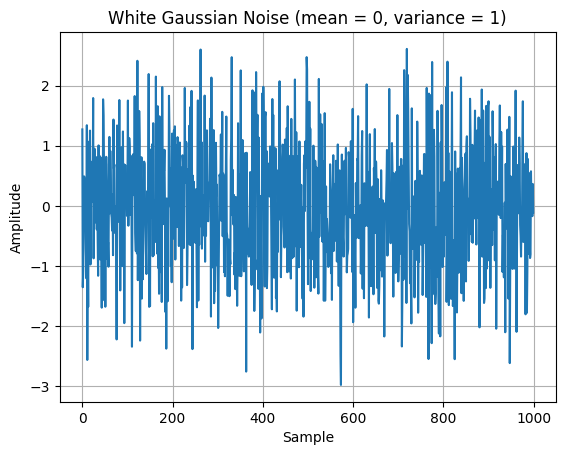

Sample mean: -0.033963360799448464
Sample variance: 0.999314557724739


In [ ]:
# Parameters
N = 1000  # Number of samples

# Generate white Gaussian noise (mean = 0, variance = 1)
noise = np.random.normal(loc=0, scale=1, size=N)

# Plot the noise signal
plt.plot(noise)
plt.title("White Gaussian Noise (mean = 0, variance = 1)")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

# Check mean and variance
print("Sample mean:", np.mean(noise))
print("Sample variance:", np.var(noise))




- Give me a python code to calculate the PSD with the periodogram process
- Fix the code to generate a plot with only the positive part and X axis with logarimical form
- Normalize the signal properly

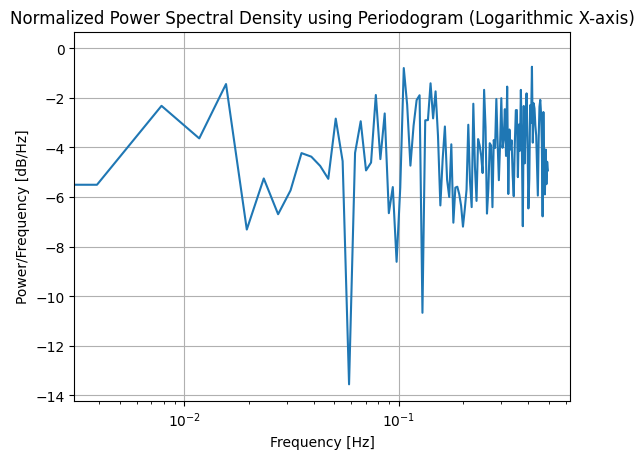

In [ ]:
# Generate a white Gaussian noise signal (mean = 0, variance = 1)
np.random.seed(0)
N = 1024  # Number of samples
signal = np.random.normal(0, 1, N)

# Define segment length (nperseg) and overlap
nperseg = 256
noverlap = 128  # 50% overlap

# Calculate the number of segments
nsegments = (N - noverlap) // (nperseg - noverlap)

# Initialize an array to store the periodogram of each segment
periodograms = []

# Compute the periodogram for each segment
for i in range(nsegments):
    # Start and end indices of the segment
    start = i * (nperseg - noverlap)
    end = start + nperseg

    # Extract the segment
    segment = signal[start:end]

    # Compute the Fourier transform of the segment
    fft_segment = np.fft.fft(segment)

    # Compute the periodogram (squared magnitude of the FFT)
    periodogram = np.abs(fft_segment) ** 2

    # Store the periodogram
    periodograms.append(periodogram)

# Convert the list of periodograms to a numpy array
periodograms = np.array(periodograms)

# Average the periodograms to get the PSD estimate
psd_estimate = np.mean(periodograms, axis=0)

# Frequency axis
frequencies = np.fft.fftfreq(nperseg, d=1)  # d=1 for sampling rate = 1 Hz

# Only take the positive frequencies (the periodogram is symmetric)
positive_frequencies = frequencies[:nperseg // 2]
psd_estimate = psd_estimate[:nperseg // 2]

# Convert PSD to dB scale
psd_dB = 10 * np.log10(psd_estimate)

# Normalize the PSD to have its maximum value at 0 dB
psd_dB_normalized = psd_dB - np.max(psd_dB)

# Plot the normalized PSD on a logarithmic X-axis
plt.plot(positive_frequencies, psd_dB_normalized)  # in dB
plt.xscale('log')  # Set X-axis to logarithmic scale
plt.title("Normalized Power Spectral Density using Periodogram (Logarithmic X-axis)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Power/Frequency [dB/Hz]")
plt.grid(True)
plt.show()


- Plot the resulting signal minus the mean
- Plot both signals side by side to make a comparation, but also normalize the plot corresponding to the periodogram minus the mean

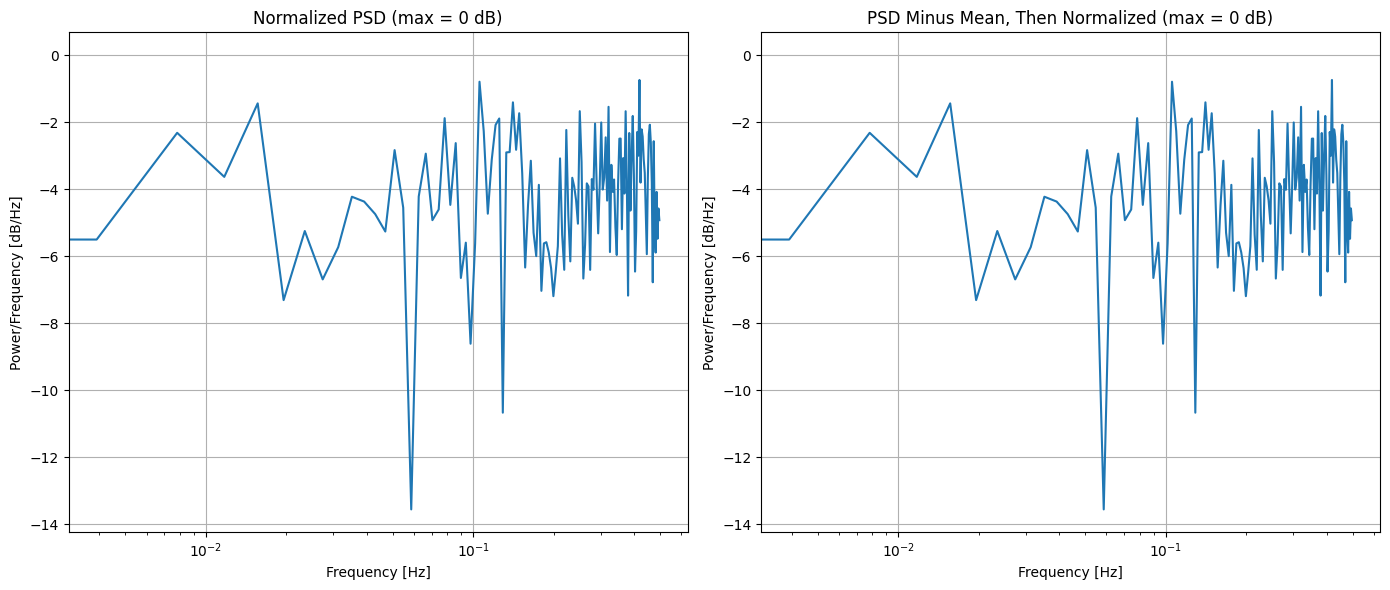

In [ ]:
# Generate a white Gaussian noise signal (mean = 0, variance = 1)
np.random.seed(0)
N = 1024
signal = np.random.normal(0, 1, N)

# Parameters for segmentation
nperseg = 256
noverlap = 128
nsegments = (N - noverlap) // (nperseg - noverlap)

# Periodogram estimation
periodograms = []
for i in range(nsegments):
    start = i * (nperseg - noverlap)
    end = start + nperseg
    segment = signal[start:end]
    fft_segment = np.fft.fft(segment)
    periodogram = np.abs(fft_segment) ** 2
    periodograms.append(periodogram)

periodograms = np.array(periodograms)
psd_estimate = np.mean(periodograms, axis=0)
frequencies = np.fft.fftfreq(nperseg, d=1)

# Use only the positive half
positive_freqs = frequencies[:nperseg // 2]
psd = psd_estimate[:nperseg // 2]

# PSD in dB
psd_dB = 10 * np.log10(psd)

# First plot: normalized to max = 0 dB
psd_dB_norm = psd_dB - np.max(psd_dB)

# Second plot: subtract mean, then normalize to max = 0 dB
psd_dB_minus_mean = psd_dB - np.mean(psd_dB)
psd_dB_minus_mean_norm = psd_dB_minus_mean - np.max(psd_dB_minus_mean)

# Plot side by side
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Left: normalized PSD
axs[0].plot(positive_freqs, psd_dB_norm)
axs[0].set_xscale('log')
axs[0].set_title("Normalized PSD (max = 0 dB)")
axs[0].set_xlabel("Frequency [Hz]")
axs[0].set_ylabel("Power/Frequency [dB/Hz]")
axs[0].grid(True)

# Right: PSD minus mean, then normalized
axs[1].plot(positive_freqs, psd_dB_minus_mean_norm)
axs[1].set_xscale('log')
axs[1].set_title("PSD Minus Mean, Then Normalized (max = 0 dB)")
axs[1].set_xlabel("Frequency [Hz]")
axs[1].set_ylabel("Power/Frequency [dB/Hz]")
axs[1].grid(True)

plt.tight_layout()
plt.show()


Make the same process but with 32 samples and compare the former normalized signals (the one with minus the mean and the one just normalized) overlaping one above the other one

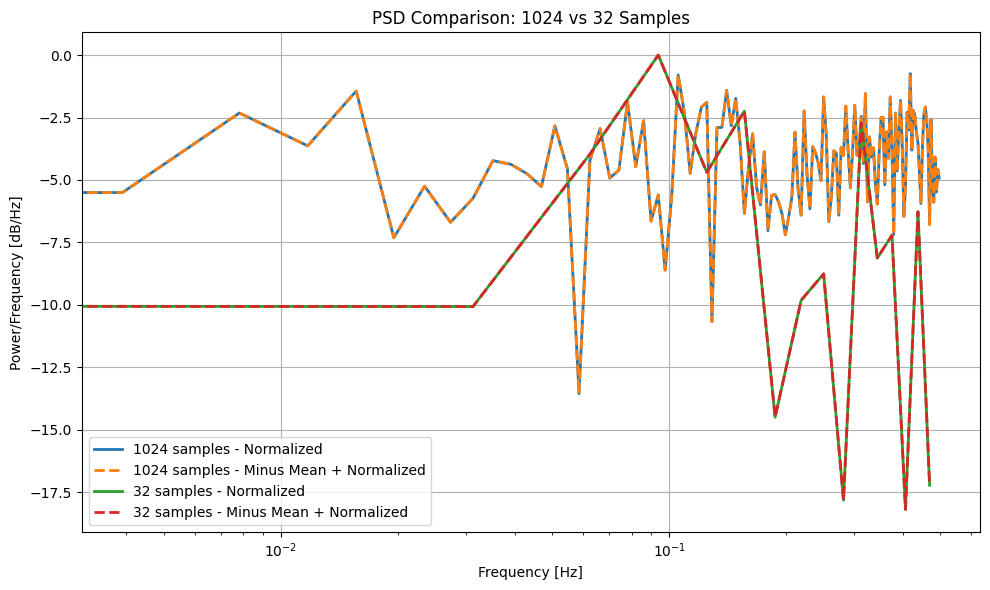

In [ ]:
def compute_psd(signal, nperseg, noverlap=0):
    N = len(signal)
    if N < nperseg:
        raise ValueError("nperseg cannot be longer than signal")

    nsegments = (N - noverlap) // (nperseg - noverlap) if noverlap < nperseg else 1
    periodograms = []

    for i in range(nsegments):
        start = i * (nperseg - noverlap)
        end = start + nperseg
        if end > N:
            break
        segment = signal[start:end]
        fft_segment = np.fft.fft(segment)
        periodogram = np.abs(fft_segment) ** 2
        periodograms.append(periodogram)

    periodograms = np.array(periodograms)
    psd_estimate = np.mean(periodograms, axis=0)
    freqs = np.fft.fftfreq(nperseg, d=1)
    return freqs[:nperseg//2], psd_estimate[:nperseg//2]

def normalize_and_process(psd):
    psd_dB = 10 * np.log10(psd + 1e-12)  # Avoid log(0)
    psd_norm = psd_dB - np.max(psd_dB)
    psd_minus_mean = psd_dB - np.mean(psd_dB)
    psd_minus_mean_norm = psd_minus_mean - np.max(psd_minus_mean)
    return psd_norm, psd_minus_mean_norm

# Generate signals
np.random.seed(0)
signal_1000 = np.random.normal(0, 1, 1024)
signal_32 = np.random.normal(0, 1, 32)

# Compute PSDs
f_1000, psd_1000 = compute_psd(signal_1000, nperseg=256, noverlap=128)
f_32, psd_32 = compute_psd(signal_32, nperseg=32, noverlap=0)

# Normalize and process both
psd_1000_norm, psd_1000_minus_mean_norm = normalize_and_process(psd_1000)
psd_32_norm, psd_32_minus_mean_norm = normalize_and_process(psd_32)

# Plot all 4 PSD curves in one figure
plt.figure(figsize=(10, 6))
plt.plot(f_1000, psd_1000_norm, label="1024 samples - Normalized", linewidth=2)
plt.plot(f_1000, psd_1000_minus_mean_norm, label="1024 samples - Minus Mean + Normalized", linestyle='--', linewidth=2)
plt.plot(f_32, psd_32_norm, label="32 samples - Normalized", linewidth=2)
plt.plot(f_32, psd_32_minus_mean_norm, label="32 samples - Minus Mean + Normalized", linestyle='--', linewidth=2)

plt.title("PSD Comparison: 1024 vs 32 Samples")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Power/Frequency [dB/Hz]")
plt.xscale('log')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Make sure to normalize both signals correctly

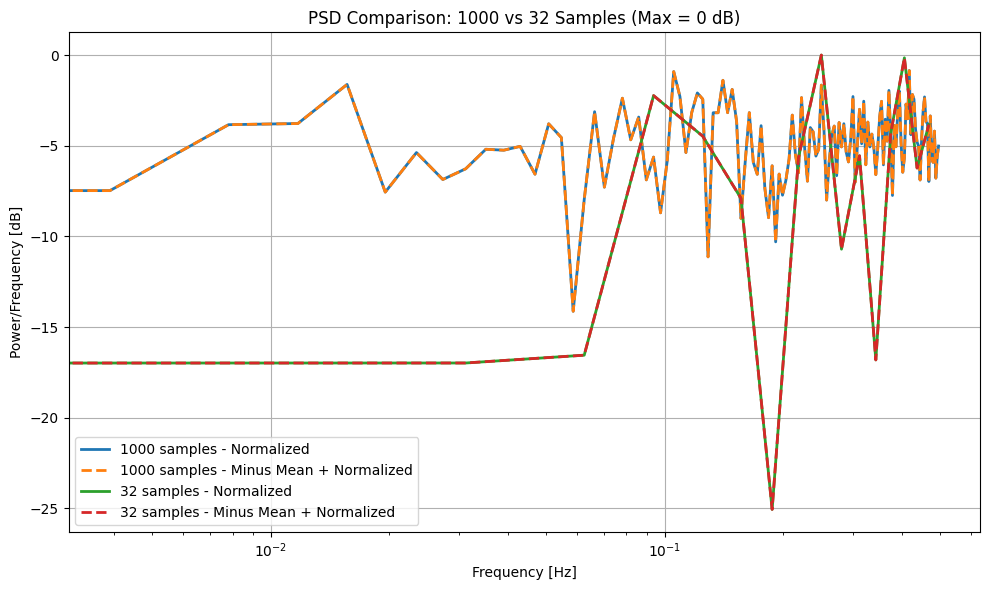

In [ ]:
def compute_psd(signal, nperseg, noverlap=0):
    N = len(signal)
    step = nperseg - noverlap
    n_segments = (N - noverlap) // step
    periodograms = []

    for i in range(n_segments):
        start = i * step
        end = start + nperseg
        if end > N:
            break
        segment = signal[start:end]
        fft_segment = np.fft.fft(segment)
        psd = np.abs(fft_segment) ** 2 / nperseg  # Linear scale
        periodograms.append(psd)

    avg_psd = np.mean(periodograms, axis=0)
    freqs = np.fft.fftfreq(nperseg, d=1)

    # Take only positive frequencies
    positive_idx = np.where(freqs >= 0)
    freqs_pos = freqs[positive_idx]
    psd_pos = avg_psd[positive_idx]

    return freqs_pos, psd_pos  # Still in linear scale

def normalize_psd(psd_linear):
    psd_norm_linear = psd_linear / np.max(psd_linear)  # Normalize max to 1
    psd_dB = 10 * np.log10(psd_norm_linear + 1e-12)     # Convert to dB
    return psd_dB

def normalize_psd_minus_mean(psd_linear):
    psd_dB = 10 * np.log10(psd_linear + 1e-12)
    psd_minus_mean = psd_dB - np.mean(psd_dB)
    psd_minus_mean_norm = psd_minus_mean - np.max(psd_minus_mean)
    return psd_minus_mean_norm

# Generate signals
np.random.seed(0)
signal_1000 = np.random.normal(0, 1, 1000)
signal_32 = np.random.normal(0, 1, 32)

# Compute PSDs in linear scale
f_1000, psd_1000 = compute_psd(signal_1000, nperseg=256, noverlap=128)
f_32, psd_32 = compute_psd(signal_32, nperseg=32, noverlap=0)

# Normalize both sets
psd_1000_norm = normalize_psd(psd_1000)
psd_1000_minus_mean_norm = normalize_psd_minus_mean(psd_1000)
psd_32_norm = normalize_psd(psd_32)
psd_32_minus_mean_norm = normalize_psd_minus_mean(psd_32)

# Plot all 4 PSD curves
plt.figure(figsize=(10, 6))
plt.plot(f_1000, psd_1000_norm, label="1000 samples - Normalized", linewidth=2)
plt.plot(f_1000, psd_1000_minus_mean_norm, label="1000 samples - Minus Mean + Normalized", linestyle='--', linewidth=2)
plt.plot(f_32, psd_32_norm, label="32 samples - Normalized", linewidth=2)
plt.plot(f_32, psd_32_minus_mean_norm, label="32 samples - Minus Mean + Normalized", linestyle='--', linewidth=2)

plt.title("PSD Comparison: 1000 vs 32 Samples (Max = 0 dB)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Power/Frequency [dB]")
plt.xscale('log')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Now make the exact same process but  with 32 samples, 64 samples, 128 samples, 512 samples and 1024 samples. Make sure to overlap them all on one plot

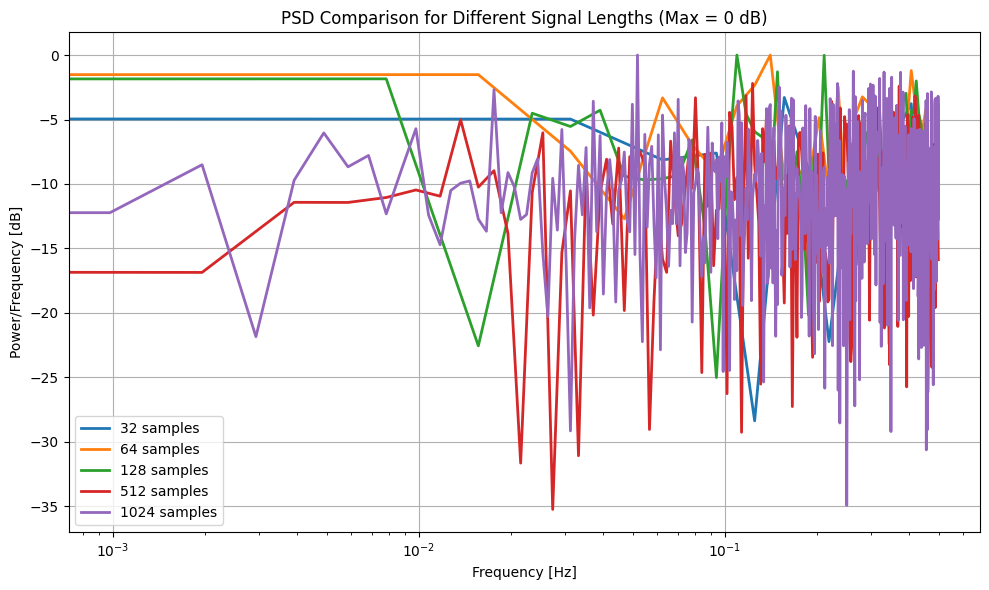

In [ ]:
def compute_psd(signal, nperseg, noverlap=0):
    N = len(signal)
    step = nperseg - noverlap
    n_segments = (N - noverlap) // step
    periodograms = []

    for i in range(n_segments):
        start = i * step
        end = start + nperseg
        if end > N:
            break
        segment = signal[start:end]
        fft_segment = np.fft.fft(segment)
        psd = np.abs(fft_segment) ** 2 / nperseg
        periodograms.append(psd)

    avg_psd = np.mean(periodograms, axis=0)
    freqs = np.fft.fftfreq(nperseg, d=1)

    # Keep only positive frequencies
    positive_idx = np.where(freqs >= 0)
    return freqs[positive_idx], avg_psd[positive_idx]

def normalize_psd(psd_linear):
    psd_norm_linear = psd_linear / np.max(psd_linear)
    psd_dB = 10 * np.log10(psd_norm_linear + 1e-12)
    return psd_dB

# Define sample sizes
sample_sizes = [32, 64, 128, 512, 1024]
psd_results = {}

# Seed for reproducibility
np.random.seed(0)

# Compute and normalize PSDs
for size in sample_sizes:
    signal = np.random.normal(0, 1, size)
    nperseg = size  # Use full signal as segment
    noverlap = 0 if size < 128 else size // 4  # Overlap for larger sizes

    f, psd = compute_psd(signal, nperseg=nperseg, noverlap=noverlap)
    psd_dB = normalize_psd(psd)
    psd_results[size] = (f, psd_dB)

# Plotting
plt.figure(figsize=(10, 6))
for size in sample_sizes:
    f, psd_dB = psd_results[size]
    plt.plot(f, psd_dB, label=f"{size} samples", linewidth=2)

plt.title("PSD Comparison for Different Signal Lengths (Max = 0 dB)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Power/Frequency [dB]")
plt.xscale('log')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Add to all those signals a cosine signal and make the same process for each one of them. Make sure to dicrease the power noise to 0.1

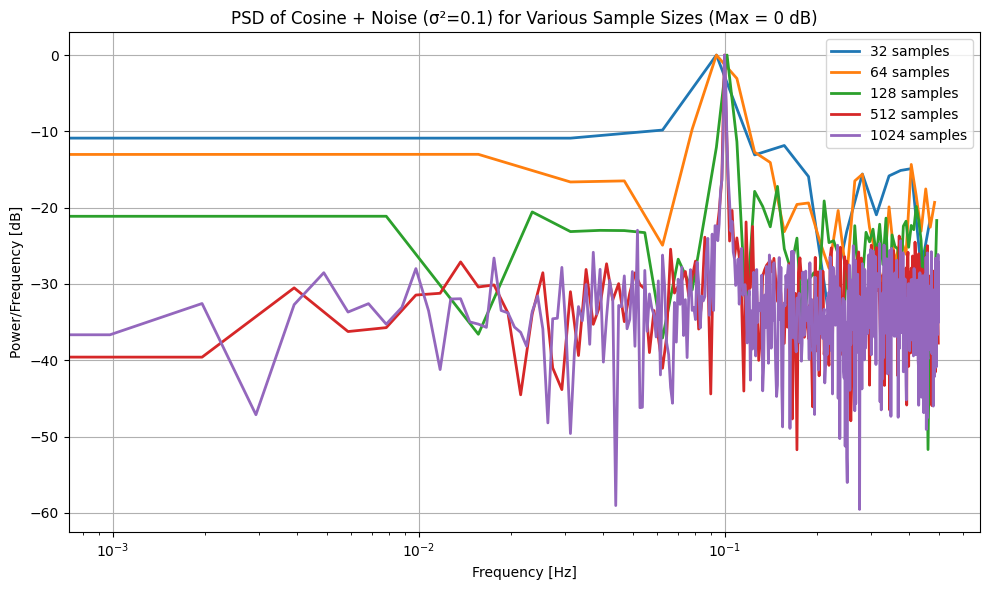

In [ ]:
def compute_psd(signal, nperseg, noverlap=0):
    N = len(signal)
    step = nperseg - noverlap
    n_segments = (N - noverlap) // step
    periodograms = []

    for i in range(n_segments):
        start = i * step
        end = start + nperseg
        if end > N:
            break
        segment = signal[start:end]
        fft_segment = np.fft.fft(segment)
        psd = np.abs(fft_segment) ** 2 / nperseg
        periodograms.append(psd)

    avg_psd = np.mean(periodograms, axis=0)
    freqs = np.fft.fftfreq(nperseg, d=1)

    # Keep only positive frequencies
    positive_idx = np.where(freqs >= 0)
    return freqs[positive_idx], avg_psd[positive_idx]

def normalize_psd(psd_linear):
    psd_norm_linear = psd_linear / np.max(psd_linear)
    psd_dB = 10 * np.log10(psd_norm_linear + 1e-12)
    return psd_dB

# Sample sizes to test
sample_sizes = [32, 64, 128, 512, 1024]
psd_results = {}

# Cosine parameters
f0 = 0.1  # Normalized frequency (cycles/sample)
amplitude = 1.0  # Amplitude of cosine

np.random.seed(0)  # For reproducibility

# Loop over each signal size
for size in sample_sizes:
    n = np.arange(size)

    # Create cosine signal
    cosine = amplitude * np.cos(2 * np.pi * f0 * n)

    # Generate low-power white Gaussian noise (variance = 0.1)
    noise = np.random.normal(0, np.sqrt(0.1), size)

    # Composite signal
    signal = cosine + noise

    # Choose segment length and overlap
    nperseg = size
    noverlap = 0 if size < 128 else size // 4

    # PSD
    f, psd = compute_psd(signal, nperseg=nperseg, noverlap=noverlap)
    psd_dB = normalize_psd(psd)
    psd_results[size] = (f, psd_dB)

# Plotting
plt.figure(figsize=(10, 6))
for size in sample_sizes:
    f, psd_dB = psd_results[size]
    plt.plot(f, psd_dB, label=f"{size} samples", linewidth=2)

plt.title("PSD of Cosine + Noise (σ²=0.1) for Various Sample Sizes (Max = 0 dB)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Power/Frequency [dB]")
plt.xscale('log')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


- Modify the code to calculate the welch estimation using a window function and compare the results visually

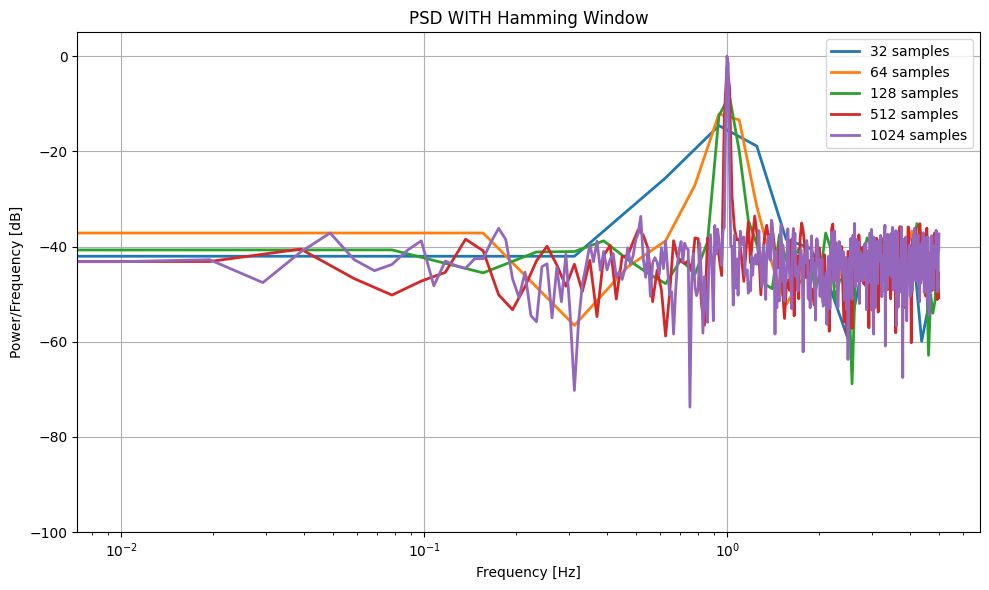

In [ ]:
# PSD without window
def compute_psd(signal, nperseg, noverlap=0):
    N = len(signal)
    step = nperseg - noverlap
    n_segments = (N - noverlap) // step
    periodograms = []

    for i in range(n_segments):
        start = i * step
        end = start + nperseg
        if end > N:
            break
        segment = signal[start:end]
        fft_segment = np.fft.fft(segment)
        psd = np.abs(fft_segment) ** 2 / nperseg
        periodograms.append(psd)

    avg_psd = np.mean(periodograms, axis=0)
    freqs = np.fft.fftfreq(nperseg, d=1)
    positive_idx = np.where(freqs >= 0)
    return freqs[positive_idx], avg_psd[positive_idx]

# PSD with Hamming window and correction factor
def compute_psd_with_window(signal, nperseg, noverlap=0, window_fn=np.hamming):
    N = len(signal)
    step = nperseg - noverlap
    n_segments = (N - noverlap) // step
    periodograms = []

    for i in range(n_segments):
        start = i * step
        end = start + nperseg
        if end > N:
            break
        segment = signal[start:end]
        window = window_fn(nperseg)
        windowed_segment = segment * window
        U = np.sum(window**2) / nperseg  # window correction factor
        fft_segment = np.fft.fft(windowed_segment)
        psd = (np.abs(fft_segment) ** 2) / (nperseg * U)
        periodograms.append(psd)

    avg_psd = np.mean(periodograms, axis=0)
    freqs = np.fft.fftfreq(nperseg, d=1)
    positive_idx = np.where(freqs >= 0)
    return freqs[positive_idx], avg_psd[positive_idx]

# ------------------------- CONFIG -------------------------
sample_sizes = [32, 64, 128, 512, 1024]
f0 = 0.1           # Normalized frequency (cycles/sample)
amplitude = 1.0    # Cosine amplitude
noise_var = 0.01   # Reduce noise power to increase SNR
np.random.seed(0)

psd_results = {}
psd_results_windowed = {}

# ----------------- SIGNAL GENERATION & PSD -----------------
for size in sample_sizes:
    n = np.arange(size)
    cosine = amplitude * np.cos(2 * np.pi * f0 * n)
    noise = np.random.normal(0, np.sqrt(noise_var), size)
    signal = cosine + noise

    nperseg = size
    noverlap = 0 if size < 128 else size // 4

    # Windowed PSD
    f_win, psd_win = compute_psd_with_window(signal, nperseg=nperseg, noverlap=noverlap)
    psd_results_windowed[size] = (f_win, psd_win)  # store linear

# ---------------- GLOBAL NORMALIZATION ----------------
# Max PSD value across all PSDs (windowed + unwindowed)
global_max = max(
    np.max(psd) for _, psd in list(psd_results.values()) + list(psd_results_windowed.values())
)

# Normalize all to 0 dB global reference
for size in sample_sizes:

    f_win, psd_win = psd_results_windowed[size]
    psd_dB_win = 10 * np.log10(psd_win / global_max + 1e-12)
    psd_results_windowed[size] = (f_win, psd_dB_win)

# ---------------------- PLOTTING -----------------------

# PSD with Hamming window
plt.figure(figsize=(10, 6))
for size in sample_sizes:
    f_win, psd_dB_win = psd_results_windowed[size]
    plt.plot(f_win * 10, psd_dB_win, label=f"{size} samples", linewidth=2)

plt.title("PSD WITH Hamming Window")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Power/Frequency [dB]")
plt.xscale('log')
plt.ylim([-100, 5])
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Increase the number of windows to reduce the noise
(It was made with the welch function of the library scipy)

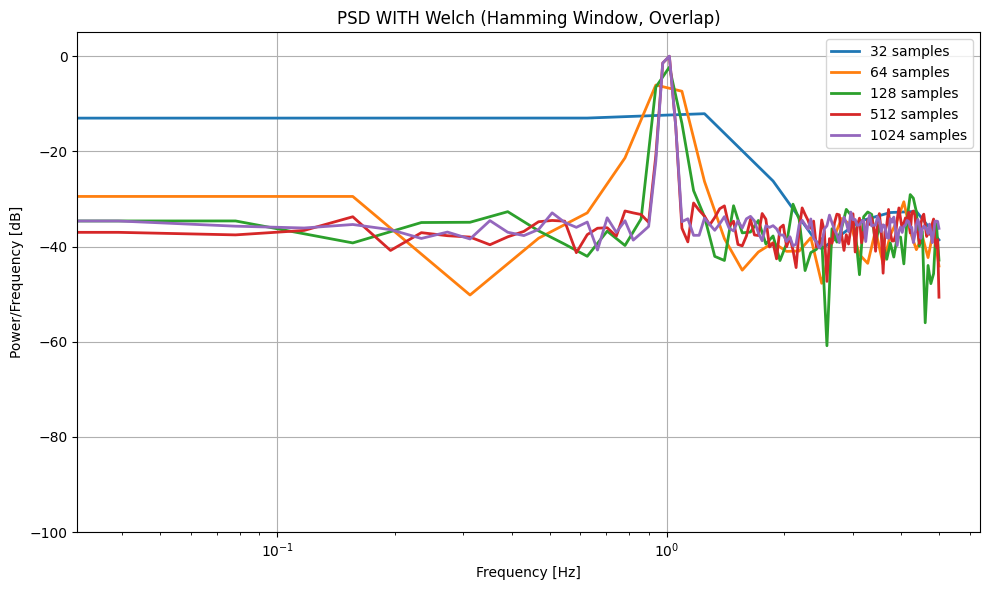

In [ ]:
from scipy.signal import welch

# ------------------------- CONFIG -------------------------
sample_sizes = [32, 64, 128, 512, 1024]
f0 = 0.1           # Normalized frequency (cycles/sample)
amplitude = 1.0    # Cosine amplitude
noise_var = 0.01   # Reduce noise power to increase SNR
np.random.seed(0)

psd_results_windowed = {}

# ----------------- SIGNAL GENERATION & PSD -----------------
for size in sample_sizes:
    n = np.arange(size)
    cosine = amplitude * np.cos(2 * np.pi * f0 * n)
    noise = np.random.normal(0, np.sqrt(noise_var), size)
    signal = cosine + noise

    # Welch parameters
    nperseg = min(256, size) if size >= 64 else size // 2 #size of the segment
    noverlap = nperseg // 2 #amount of overlap between segments defined as 50%

    # Welch PSD (with Hamming window) Power unities per Herz
    f_win, psd_win = welch(signal, window='hamming', nperseg=nperseg, noverlap=noverlap, return_onesided=True, scaling='density')

    # Store PSD in linear scale
    psd_results_windowed[size] = (f_win, psd_win)

# ---------------- GLOBAL NORMALIZATION ----------------
#Find the maximum value of all PSDs to normalize in relative dB scale
global_max = max(np.max(psd) for _, psd in psd_results_windowed.values())

#logarithmical scale
for size in sample_sizes:
    f_win, psd_win = psd_results_windowed[size]
    psd_dB_win = 10 * np.log10(psd_win / global_max + 1e-12)
    psd_results_windowed[size] = (f_win, psd_dB_win)

# ---------------------- PLOTTING -----------------------
plt.figure(figsize=(10, 6))
for size in sample_sizes:
    f_win, psd_dB_win = psd_results_windowed[size]
    plt.plot(f_win * 10, psd_dB_win, label=f"{size} samples", linewidth=2)

plt.title("PSD WITH Welch (Hamming Window, Overlap)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Power/Frequency [dB]")
plt.xscale('log')
plt.ylim([-100, 5])
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


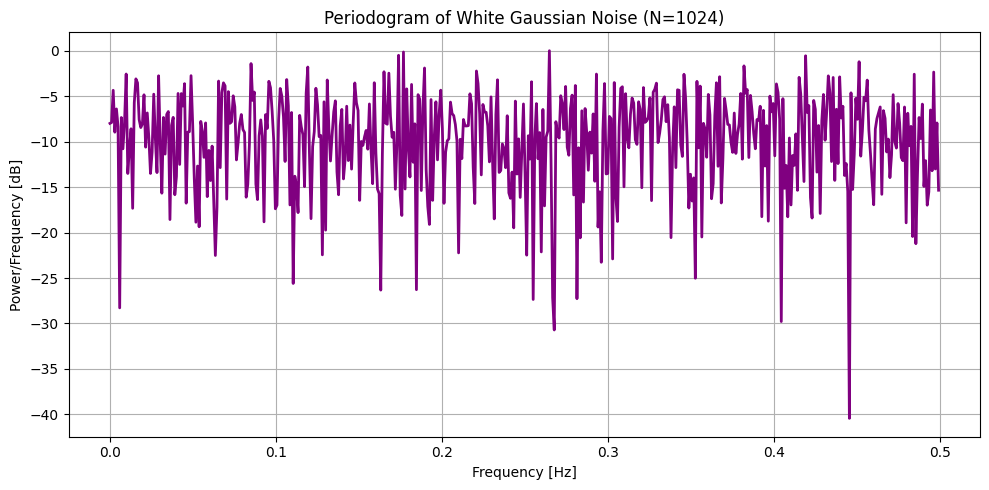

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 1024                          # Number of samples
noise_variance = 1.0             # Variance of white Gaussian noise
np.random.seed(42)               # For reproducibility

# Generate white Gaussian noise
noise = np.random.normal(0, np.sqrt(noise_variance), N)

# Compute FFT and periodogram
fft_noise = np.fft.fft(noise)
psd = np.abs(fft_noise) ** 2 / N
freqs = np.fft.fftfreq(N, d=1)

# Keep only positive frequencies
positive_freqs = freqs[:N//2]
positive_psd = psd[:N//2]

# Normalize and convert to dB
psd_normalized = positive_psd / np.max(positive_psd)
psd_dB = 10 * np.log10(psd_normalized + 1e-12)  # Avoid log(0)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(positive_freqs, psd_dB, color='purple', lw=2)
plt.title("Periodogram of White Gaussian Noise (N=1024)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Power/Frequency [dB]")
plt.grid(True)
plt.tight_layout()
plt.show()


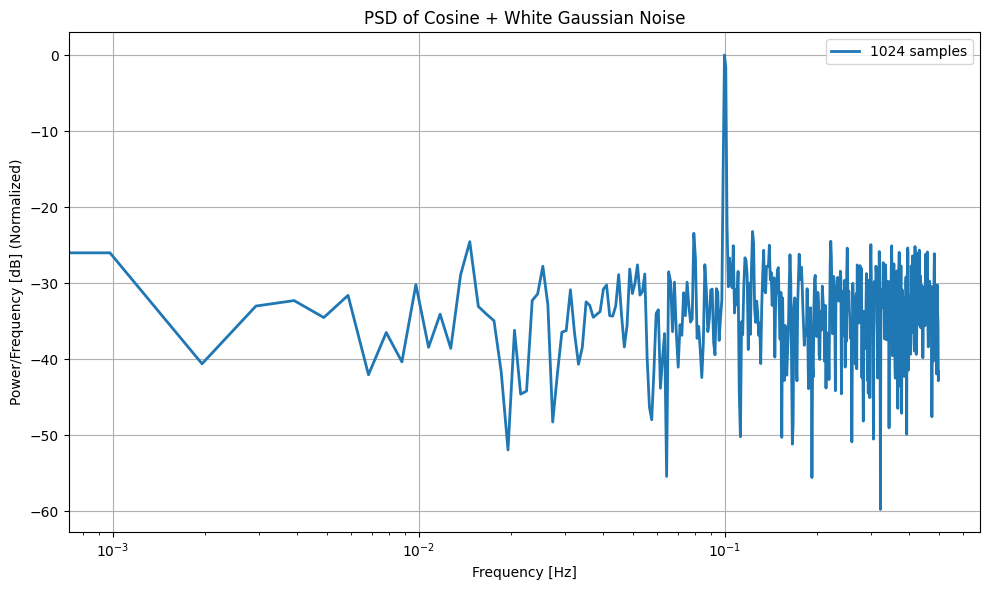

In [ ]:
# === Welch PSD Function with Hamming window ===
def compute_psd(signal, nperseg, noverlap=0):
    N = len(signal)
    step = nperseg - noverlap
    n_segments = (N - noverlap) // step
    periodograms = []

    window = np.hamming(nperseg)

    for i in range(n_segments):
        start = i * step
        end = start + nperseg
        if end > N:
            break
        segment = signal[start:end]
        windowed_segment = segment * window
        scale = np.sum(window**2)
        fft_segment = np.fft.fft(windowed_segment)
        psd = (np.abs(fft_segment) ** 2) / scale
        periodograms.append(psd)

    avg_psd = np.mean(periodograms, axis=0)
    freqs = np.fft.fftfreq(nperseg, d=1)
    positive_idx = np.where(freqs >= 0)
    return freqs[positive_idx], avg_psd[positive_idx]

# === Parameters ===
sample_sizes = [1024]
f0 = 0.1             # Normalized frequency of cosine
amplitude = 1.0      # Cosine amplitude
noise_variance = 0.1
np.random.seed(0)    # Reproducibility
psd_results = {}

# === Loop over sizes ===
for size in sample_sizes:
    n = np.arange(size)
    cosine = amplitude * np.cos(2 * np.pi * f0 * n)
    noise = np.random.normal(0, np.sqrt(noise_variance), size)
    signal = cosine + noise

    nperseg = size
    noverlap = 0 if size < 128 else size // 4

    freqs, psd = compute_psd(signal, nperseg=nperseg, noverlap=noverlap)
    psd_norm = psd / np.max(psd)
    psd_dB = 10 * np.log10(psd_norm + 1e-12)
    psd_results[size] = (freqs, psd_dB)

# === Plotting ===
plt.figure(figsize=(10, 6))
for size in sample_sizes:
    f, psd_dB = psd_results[size]
    plt.plot(f, psd_dB, label=f"{size} samples", linewidth=2)

plt.title("PSD of Cosine + White Gaussian Noise")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Power/Frequency [dB] (Normalized)")
plt.xscale('log')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


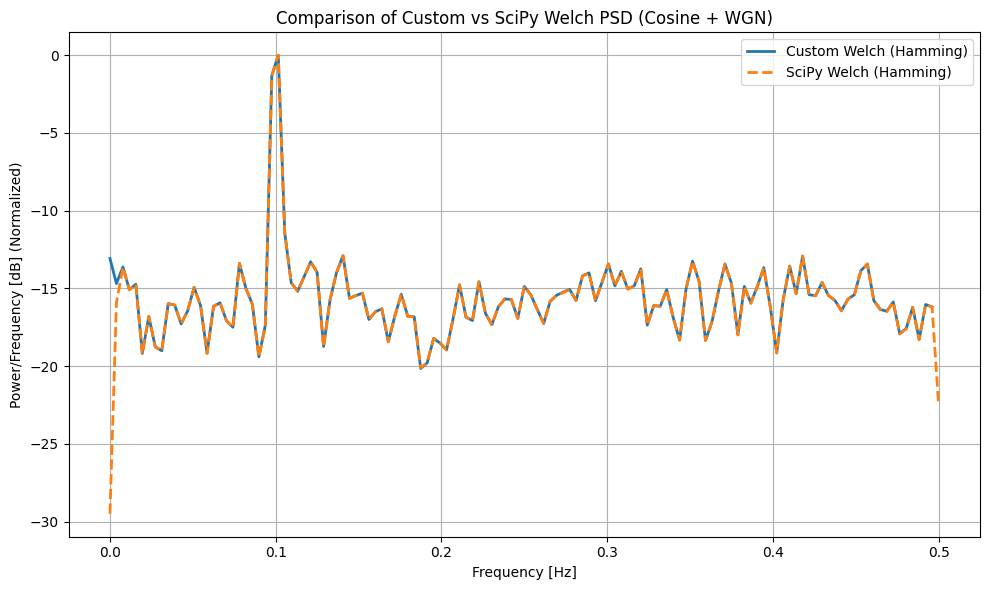

In [ ]:
from scipy.signal import welch

# === Custom Welch PSD Function (with Hamming window) ===
def compute_psd(signal, nperseg, noverlap=0):
    N = len(signal)
    step = nperseg - noverlap
    n_segments = (N - noverlap) // step
    periodograms = []

    window = np.hamming(nperseg)

    for i in range(n_segments):
        start = i * step
        end = start + nperseg
        if end > N:
            break
        segment = signal[start:end]
        windowed_segment = segment * window
        scale = np.sum(window**2)
        fft_segment = np.fft.fft(windowed_segment)
        psd = (np.abs(fft_segment) ** 2) / scale
        periodograms.append(psd)

    avg_psd = np.mean(periodograms, axis=0)
    freqs = np.fft.fftfreq(nperseg, d=1)
    positive_idx = np.where(freqs >= 0)
    return freqs[positive_idx], avg_psd[positive_idx]

# === Signal Parameters ===
N = 1024
f0 = 0.1  # Normalized frequency
amplitude = 1.0
noise_variance = 0.1
np.random.seed(0)

n = np.arange(N)
cosine = amplitude * np.cos(2 * np.pi * f0 * n)
noise = np.random.normal(0, np.sqrt(noise_variance), N)
signal = cosine + noise

# === Parameters for PSD ===
nperseg = 256
noverlap = nperseg // 2

# === 1. Custom Welch PSD ===
f_custom, psd_custom = compute_psd(signal, nperseg, noverlap)
psd_custom_dB = 10 * np.log10(psd_custom / np.max(psd_custom) + 1e-12)

# === 2. SciPy Welch PSD ===
f_scipy, psd_scipy = welch(signal, window='hamming', nperseg=nperseg, noverlap=noverlap, nfft=nperseg, return_onesided=True)
psd_scipy_dB = 10 * np.log10(psd_scipy / np.max(psd_scipy) + 1e-12)

# === Plot both PSDs ===
plt.figure(figsize=(10, 6))
plt.plot(f_custom, psd_custom_dB, label="Custom Welch (Hamming)", lw=2)
plt.plot(f_scipy, psd_scipy_dB, label="SciPy Welch (Hamming)", lw=2, linestyle='--')
plt.title("Comparison of Custom vs SciPy Welch PSD (Cosine + WGN)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Power/Frequency [dB] (Normalized)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


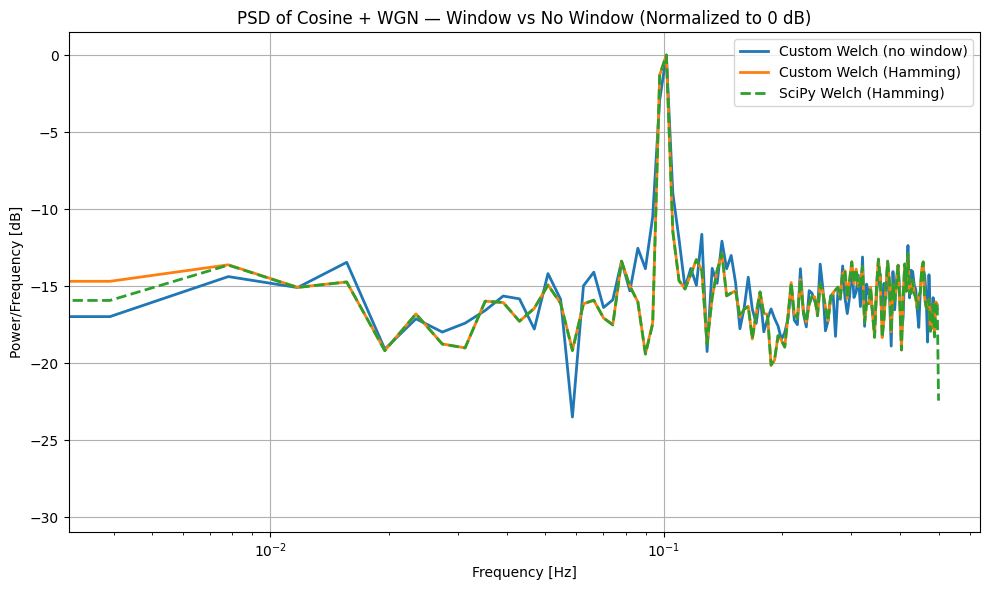

In [ ]:
# === Custom PSD Function with optional window ===
def compute_psd(signal, nperseg, noverlap=0, window_type=None):
    N = len(signal)
    step = nperseg - noverlap
    n_segments = (N - noverlap) // step
    periodograms = []

    # Select window
    if window_type == 'hamming':
        window = np.hamming(nperseg)
    else:
        window = np.ones(nperseg)  # No window

    for i in range(n_segments):
        start = i * step
        end = start + nperseg
        if end > N:
            break
        segment = signal[start:end]
        windowed_segment = segment * window
        scale = np.sum(window**2)
        fft_segment = np.fft.fft(windowed_segment)
        psd = (np.abs(fft_segment) ** 2) / scale
        periodograms.append(psd)

    avg_psd = np.mean(periodograms, axis=0)
    freqs = np.fft.fftfreq(nperseg, d=1)
    positive_idx = np.where(freqs >= 0)
    return freqs[positive_idx], avg_psd[positive_idx]

# === Signal Parameters ===
N = 1024
f0 = 0.1
amplitude = 1.0
noise_variance = 1
np.random.seed(0)

n = np.arange(N)
cosine = amplitude * np.cos(2 * np.pi * f0 * n)
noise = np.random.normal(0, np.sqrt(noise_variance), N)
signal = cosine + noise

# === PSD Parameters ===
nperseg = 256
noverlap = nperseg // 2

# === Compute PSDs ===
# (1) Custom Welch without window
f_nowin, psd_nowin = compute_psd(signal, nperseg, noverlap, window_type=None)
psd_nowin_dB = 10 * np.log10(psd_nowin / np.max(psd_nowin) + 1e-12)

# (2) Custom Welch with Hamming window
f_hamming, psd_hamming = compute_psd(signal, nperseg, noverlap, window_type='hamming')
psd_hamming_dB = 10 * np.log10(psd_hamming / np.max(psd_hamming) + 1e-12)

# (3) SciPy Welch with Hamming window
f_scipy, psd_scipy = welch(signal, window='hamming', nperseg=nperseg, noverlap=noverlap, nfft=nperseg, return_onesided=True)
psd_scipy_dB = 10 * np.log10(psd_scipy / np.max(psd_scipy) + 1e-12)

# === Plot all comparisons ===
plt.figure(figsize=(10, 6))
plt.plot(f_nowin, psd_nowin_dB, label="Custom Welch (no window)", linewidth=2)
plt.plot(f_hamming, psd_hamming_dB, label="Custom Welch (Hamming)", linewidth=2)
plt.plot(f_scipy, psd_scipy_dB, '--', label="SciPy Welch (Hamming)", linewidth=2)

plt.title("PSD of Cosine + WGN — Window vs No Window (Normalized to 0 dB)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Power/Frequency [dB]")
plt.xscale("log")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


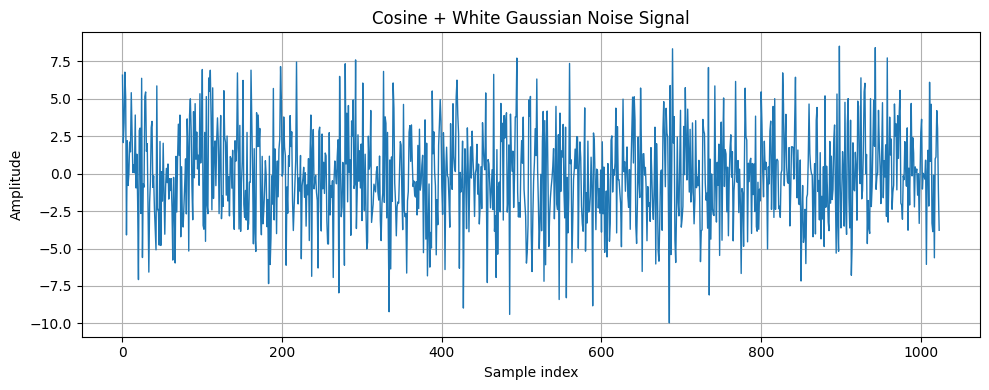

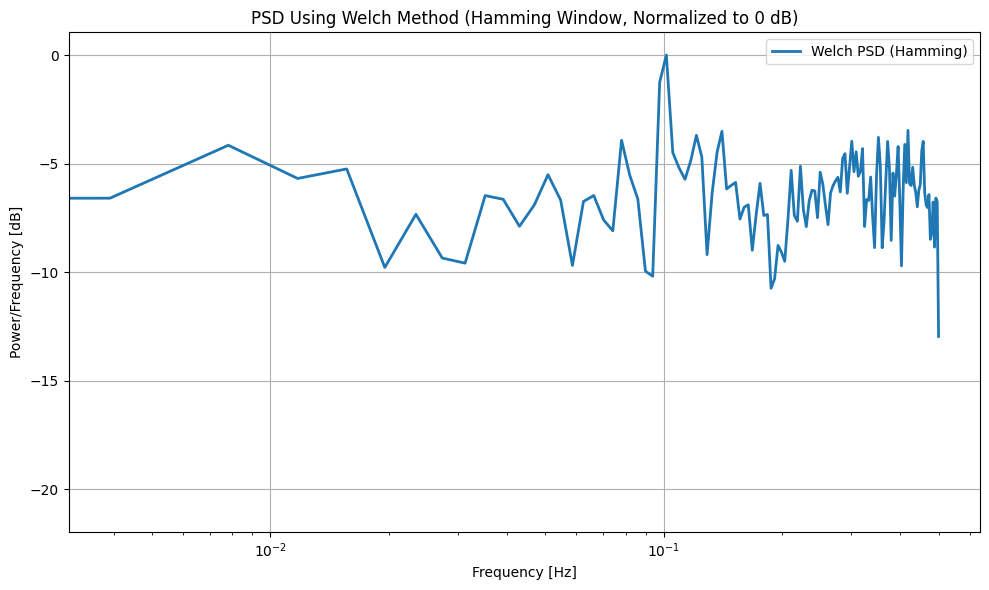

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# === Signal Parameters ===
N = 1024
f0 = 0.1  # Normalized frequency
amplitude = 1.0
noise_variance = 10
np.random.seed(0)

n = np.arange(N)
cosine = amplitude * np.cos(2 * np.pi * f0 * n)
noise = np.random.normal(0, np.sqrt(noise_variance), N)
signal = cosine + noise

# === Plot time-domain signal ===
plt.figure(figsize=(10, 4))
plt.plot(n, signal, label="Cosine + WGN", linewidth=1)
plt.title("Cosine + White Gaussian Noise Signal")
plt.xlabel("Sample index")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()

# === Welch PSD Parameters ===
nperseg = 256
noverlap = nperseg // 2

# === SciPy Welch PSD with Hamming window ===
f_scipy, psd_scipy = welch(
    signal, window='hamming', nperseg=nperseg, noverlap=noverlap, nfft=nperseg, return_onesided=True
)
psd_scipy_dB = 10 * np.log10(psd_scipy / np.max(psd_scipy) + 1e-12)

# === Plot Welch PSD ===
plt.figure(figsize=(10, 6))
plt.plot(f_scipy, psd_scipy_dB, label="Welch PSD (Hamming)", linewidth=2)
plt.title("PSD Using Welch Method (Hamming Window, Normalized to 0 dB)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Power/Frequency [dB]")
plt.xscale("log")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
